# P5 Segmentez des clients d'un site e-commerce

![alt text](DataBase_SQL.png "Title")



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
sns.set_theme(style="darkgrid")


# Importation

In [2]:
dataset_list = [
    'olist_order_reviews_dataset.csv.zip',
    'olist_customers_dataset.csv.zip',
    'olist_geolocation_dataset.csv.zip',
    'olist_order_items_dataset.csv.zip',
    'olist_order_payments_dataset.csv.zip'  ,
    'olist_orders_dataset.csv.zip',
    'olist_products_dataset.csv.zip',
    'olist_sellers_dataset.csv',
    'product_category_name_translation.csv'
]

data_name_list = [
    'order_reviews',
    'customers',
    'geolocalisation',
    'order_items',
    'order_payments',
    'orders',
    'products',
    'sellers',
    'translation'
]

data =   {key : pd.read_csv(path) for key,path in zip(data_name_list, dataset_list)}


In [3]:
data['products']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [4]:
data['sellers']

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [5]:
# res = [] 
# for name,dataset  in tmp:
#     res.append()

# Exploration

In [6]:
data['order_reviews']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [7]:
data['order_reviews']['review_comment_message'].isna().mean()

0.5870253164556962

## Clients
    on a un client unique par ligne dans le dataframe customers

In [8]:
# Nb de clients uniques == Nb de lignes ? , Combien ?
data['customers']['customer_id'].nunique() ==  data['customers'].shape[0] , data['customers']['customer_id'].nunique()

(True, 99441)

In [9]:
# Pourcentage de clients par ville, Sao Paulo en tête suivit de Rio de Janeiro
data['customers']['customer_city'].value_counts(normalize=True)

sao paulo            0.156274
rio de janeiro       0.069207
belo horizonte       0.027886
brasilia             0.021430
curitiba             0.015296
                       ...   
bequimao             0.000010
andarai              0.000010
vargem grande        0.000010
curvelandia          0.000010
eugenio de castro    0.000010
Name: customer_city, Length: 4119, dtype: float64

#### Mais un client peut avoir plusieurs commandes dans le dataframe *orders*

In [10]:
data['orders']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


# Order items 
    Nous donne ID des produits, le prix , freight_value == frais de transport/perte transport

In [11]:
print(data['order_items'].columns)

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


In [12]:
data['order_items'].describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


# Order Payments

In [13]:
data['order_payments']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


# Jointure

    Dans un premier temps
    
    On laisse de cotès les tables 
    - reviews : commentaires (en portugais brésilien), 58 % de NA 
    - sellers : les vendeurs, on a déjà la catégories des biens, à voir dans un second temps la pertience de cette table 
    - geolocalisation : on déjà les villes des clients, surplus d'information ?
    
    On sélectionne ainsi : 
    - orders : date de livraison, date d'achat
    - payments : type de paiement, valeurs
    - customers : ID client, localisation
    - items : prix, valeur de fret/transport
    - Products : catégorie, dimension(poids, largeur, longeur...) 
    

In [14]:
# On a order_id pour orders, order_payments,order_items
data['orders'].columns, data['order_payments'].columns, data['order_items'].columns

(Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
        'order_approved_at', 'order_delivered_carrier_date',
        'order_delivered_customer_date', 'order_estimated_delivery_date'],
       dtype='object'),
 Index(['order_id', 'payment_sequential', 'payment_type',
        'payment_installments', 'payment_value'],
       dtype='object'),
 Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
        'shipping_limit_date', 'price', 'freight_value'],
       dtype='object'))

In [15]:
# jointure entre orders,order_payments et order_items par clé primaire : order_id
df_orders = (
    data['orders'].merge(
    data['order_payments'].merge(data['order_items'])
)
)
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,credit_card,3,195.00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
117597,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,credit_card,5,271.01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
117598,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,credit_card,4,441.16,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
117599,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,credit_card,4,441.16,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [16]:
# jointure entre df_orders et les tables products et customers
df = data['products'].merge(df_orders.merge(data['customers']))
df.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_item_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

In [17]:
df['product_photos_qty'].value_counts() # Nombre de photos par produits ?

1.0     58539
2.0     22896
3.0     12920
4.0      8830
5.0      5585
6.0      3935
7.0      1556
8.0       772
10.0      353
9.0       318
11.0       73
12.0       60
13.0       30
15.0       12
17.0       11
14.0        6
18.0        4
19.0        2
20.0        1
Name: product_photos_qty, dtype: int64

# Méthode RFM
    - Récence : moins d’un mois, entre 1 et 5 mois, entre 5 et 10 mois, plus de 10 mois…
    - Fréquence : moins de 2 achats, entre 2 et 5 achats, plus de 5 achats…
    - Montant : moins de 20 euros, de 20 à 50 euros, de 50 à 100 euros, plus de 100 euros…

In [18]:
#df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp']).astype('datetime64[D]')
# df['order_purchase_timestamp']

In [19]:
# pd.datetime.now() - df['order_purchase_timestamp']

In [20]:
# (pd.datetime.now() - df['order_purchase_timestamp']).astype('timedelta64[D]')

## Nombre de jours entre aujourd'hui et le dernier achat

In [21]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp']).astype('datetime64[D]')

df['nb_days'] = (datetime.now() - df['order_purchase_timestamp']).astype('timedelta64[D]')

In [22]:
df['nb_days']

0         1828.0
1         1911.0
2         1752.0
3         1727.0
4         1841.0
           ...  
117596    1939.0
117597    1877.0
117598    1877.0
117599    1877.0
117600    1763.0
Name: nb_days, Length: 117601, dtype: float64

In [23]:
df[['customer_unique_id','order_purchase_timestamp']]

,customer_unique_id,order_purchase_timestamp
0,b1a1199364a4a7fe27c4486ab63f550d,2018-04-24
1,4b86049cb99e4aa774031daa9cd18f18,2018-01-31
2,f63805d9c7edb84d92413af34b86a39c,2018-07-09
3,619e926d09b26efbd5180368b1ddc874,2018-08-03
4,ad353b4fb0e294adc4eda48af73e68a6,2018-04-11
...,...,...
117596,4d1bbadcfd9bdc738e54599627870319,2018-01-03
117597,2cc893f1618b7317170ba2456cf76117,2018-03-06
117598,2cc893f1618b7317170ba2456cf76117,2018-03-06
117599,2cc893f1618b7317170ba2456cf76117,2018-03-06


In [55]:
rfm = df.groupby('customer_unique_id').agg({'nb_days' : np.min, 
                                      'order_purchase_timestamp' : len,
                                      'payment_value' : np.sum
                                     }).reset_index()

rfm = rfm.rename(columns={'nb_days' : 'r', # récence
            'order_purchase_timestamp' : 'f', # fréquence
            'payment_value' : 'm' }) # montant
rfm

,customer_unique_id,r,f,m
0,0000366f3b9a7992bf8c76cfdf3221e2,1812.0,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1815.0,1,27.19
2,0000f46a3911fa3c0805444483337064,2238.0,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2022.0,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,1989.0,1,196.89
...,...,...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,2148.0,2,4134.84
95415,fffea47cd6d3cc0a88bd621562a9d061,1963.0,1,84.58
95416,ffff371b4d645b6ecea244b27531430a,2269.0,1,112.46
95417,ffff5962728ec6157033ef9805bacc48,1820.0,1,133.69


In [25]:
rfm.isna().sum()

customer_unique_id    0
r                     0
f                     0
m                     0
dtype: int64

### 85 % des clients consomment un seul bien

In [50]:
round(rfm.f.value_counts(normalize=True).head(10),4)*100

1     84.98
2     11.16
3      2.03
4      0.95
5      0.33
6      0.29
7      0.08
8      0.04
12     0.03
10     0.02
Name: f, dtype: float64

In [27]:
rfm.m.value_counts().tail(20)

262.33     1
220.18     1
543.84     1
225.68     1
1823.24    1
181.03     1
483.81     1
246.53     1
484.69     1
403.69     1
147.03     1
626.97     1
385.32     1
697.58     1
413.08     1
616.56     1
420.76     1
517.95     1
614.49     1
4134.84    1
Name: m, dtype: int64

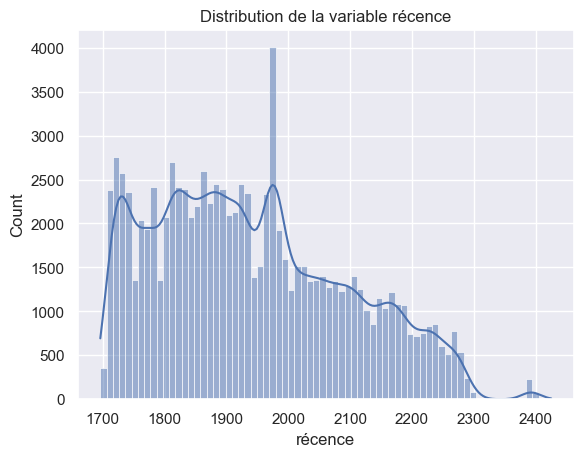

In [28]:
sns.histplot(data = rfm, x = "r" , kde=True)
plt.title('Distribution de la variable récence')
plt.xlabel('récence')
plt.show()

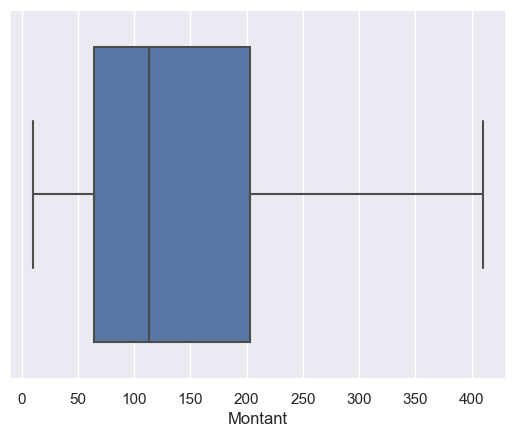

In [29]:
sns.boxplot(data= rfm, x='m', showfliers = False)
plt.title('')
plt.xlabel('Montant')
plt.show()

In [30]:
rfm.describe()

,r,f,m
count,95419.000000,95419.000000,95419.000000
mean,1939.496484,1.232469,212.831142
std,153.153950,0.823064,641.763082
min,1696.000000,1.000000,9.590000
25%,1815.000000,1.000000,63.910000
50%,1920.000000,1.000000,113.150000
75%,2049.000000,1.000000,202.545000
max,2425.000000,75.000000,109312.640000


In [57]:
# Score par quantile
rfm['rq'] = pd.cut(rfm.r,bins=np.quantile(rfm.r, q = [0,0.33,0.66,1]),labels=['2','1','0'])#.astype('str')

rfm['fq'] = pd.cut(rfm.f, bins= [0,1,2,100], labels=['0','1','2'])#.astype('str')

rfm['mq'] = pd.cut(rfm.m,bins=np.quantile(rfm.m, q = [0,0.33,0.66,1]),labels=['0','1','2'])#.astype('str')

rfm =  rfm.dropna()

rfm[['rq','fq','mq']] =  rfm[['rq','fq','mq']].astype('str')

# rfm['rq'] = rfm['rq'].astype('str')
# rfm['fq'] = rfm['fq'].astype('str')
# rfm['mq'] = rfm['mq'].astype('str')


# Score composite
rfm['score'] = rfm['rq'] + rfm['fq'] + rfm['mq']

rfm

C:\Users\Hankour\AppData\Local\Temp\ipykernel_43200\1830547920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['rq'] = pd.cut(rfm.r,bins=np.quantile(rfm.r, q = [0,0.33,0.66,1]),labels=['2','1','0'])#.astype('str')
C:\Users\Hankour\AppData\Local\Temp\ipykernel_43200\1830547920.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['fq'] = pd.cut(rfm.f, bins= [0,1,2,100], labels=['0','1','2'])#.astype('str')
C:\Users\Hankour\AppData\Local\Temp\ipykernel_43200\1830547920.py:6: SettingWithCopyWarning: 

,customer_unique_id,r,f,m,rq,fq,mq,score
0,0000366f3b9a7992bf8c76cfdf3221e2,1812.0,1,141.90,2,0,1,201
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1815.0,1,27.19,2,0,0,200
2,0000f46a3911fa3c0805444483337064,2238.0,1,86.22,0,0,1,001
3,0000f6ccb0745a6a4b88665a16c9f078,2022.0,1,43.62,0,0,0,000
4,0004aac84e0df4da2b147fca70cf8255,1989.0,1,196.89,0,0,2,002
...,...,...,...,...,...,...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,2148.0,2,4134.84,0,1,2,012
95415,fffea47cd6d3cc0a88bd621562a9d061,1963.0,1,84.58,1,0,1,101
95416,ffff371b4d645b6ecea244b27531430a,2269.0,1,112.46,0,0,1,001
95417,ffff5962728ec6157033ef9805bacc48,1820.0,1,133.69,2,0,1,201


In [58]:
rfm.loc[
    (rfm['score'] == '21nan') |
    (rfm['score'] == 'nan12')
]

,customer_unique_id,r,f,m,rq,fq,mq,score


In [59]:
rfm.score.value_counts()

000    10380
100    10190
200     9790
201     9786
001     9755
101     9377
202     7390
002     7264
102     7146
112     2513
212     2489
012     2456
222     1098
122     1039
022     1037
011      878
211      722
111      696
010      355
110      280
210      260
021      124
020       90
121       78
120       75
221       75
220       62
Name: score, dtype: int64

In [60]:
rfm.score.nunique() 

27

In [36]:
rfm.score.value_counts().head()

000    10381
100    10190
200     9795
201     9789
001     9755
Name: score, dtype: int64

In [37]:
rfm.isna().sum()

customer_unique_id    0
r                     0
f                     0
m                     0
rq                    0
fq                    0
mq                    0
score                 0
dtype: int64

In [38]:
rfm.describe()

,r,f,m
count,95417.000000,95417.000000,95417.000000
mean,1939.501493,1.232453,212.832013
std,153.151645,0.823065,641.769353
min,1701.000000,1.000000,10.070000
25%,1815.000000,1.000000,63.910000
50%,1920.000000,1.000000,113.150000
75%,2049.000000,1.000000,202.540000
max,2425.000000,75.000000,109312.640000


## Passage en log 
    transformer les variables en log pour avoir une distribution moins étirée

In [61]:
rfm['log_r'] = np.log(rfm.r)
rfm['log_f'] = np.log(rfm.f)
rfm['log_m'] = np.log(rfm.m)

rfm

,customer_unique_id,r,f,m,rq,fq,mq,score,log_r,log_f,log_m
0,0000366f3b9a7992bf8c76cfdf3221e2,1812.0,1,141.90,2,0,1,201,7.502186,0.000000,4.955123
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1815.0,1,27.19,2,0,0,200,7.503841,0.000000,3.302849
2,0000f46a3911fa3c0805444483337064,2238.0,1,86.22,0,0,1,001,7.713338,0.000000,4.456902
3,0000f6ccb0745a6a4b88665a16c9f078,2022.0,1,43.62,0,0,0,000,7.611842,0.000000,3.775516
4,0004aac84e0df4da2b147fca70cf8255,1989.0,1,196.89,0,0,2,002,7.595387,0.000000,5.282645
...,...,...,...,...,...,...,...,...,...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,2148.0,2,4134.84,0,1,2,012,7.672292,0.693147,8.327204
95415,fffea47cd6d3cc0a88bd621562a9d061,1963.0,1,84.58,1,0,1,101,7.582229,0.000000,4.437698
95416,ffff371b4d645b6ecea244b27531430a,2269.0,1,112.46,0,0,1,001,7.727094,0.000000,4.722598
95417,ffff5962728ec6157033ef9805bacc48,1820.0,1,133.69,2,0,1,201,7.506592,0.000000,4.895524


# RFM + satisfaction client

In [159]:
reviews = df.merge(
    data['order_reviews'][['order_id','review_score']],
    on = 'order_id',
    how= 'left'

)

reviews = reviews.loc[~reviews['review_score'].isna()].copy()

reviews = reviews.groupby('customer_unique_id')['review_score'].mean().to_frame().reset_index().copy()

reviews.head()
#reviews.groupby('customer_unique_id')['review_score'].mean().shape

,customer_unique_id,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0
2,0000f46a3911fa3c0805444483337064,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,4.0
4,0004aac84e0df4da2b147fca70cf8255,5.0


In [160]:
rfm_reviews = rfm.merge(
    reviews,
    on = 'customer_unique_id',
    how= 'left'

)

# df['col1'] =  df['col1'].fillna(df['col1'].mode()[0])
# Imputation par le mode 

mode = rfm_reviews.review_score.mode()[0]

rfm_reviews['review_score'] = rfm_reviews['review_score'].fillna(mode)

rfm_reviews.isna().mean()

customer_unique_id    0.0
r                     0.0
f                     0.0
m                     0.0
rq                    0.0
fq                    0.0
mq                    0.0
score                 0.0
log_r                 0.0
log_f                 0.0
log_m                 0.0
review_score          0.0
dtype: float64

In [161]:
rfm_reviews.review_score.mode()[0]

5.0

In [162]:
rfm_reviews

,customer_unique_id,r,f,m,rq,fq,mq,score,log_r,log_f,log_m,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,1812.0,1,141.90,2,0,1,201,7.502186,0.000000,4.955123,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1815.0,1,27.19,2,0,0,200,7.503841,0.000000,3.302849,4.0
2,0000f46a3911fa3c0805444483337064,2238.0,1,86.22,0,0,1,001,7.713338,0.000000,4.456902,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,2022.0,1,43.62,0,0,0,000,7.611842,0.000000,3.775516,4.0
4,0004aac84e0df4da2b147fca70cf8255,1989.0,1,196.89,0,0,2,002,7.595387,0.000000,5.282645,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95400,fffcf5a5ff07b0908bd4e2dbc735a684,2148.0,2,4134.84,0,1,2,012,7.672292,0.693147,8.327204,5.0
95401,fffea47cd6d3cc0a88bd621562a9d061,1963.0,1,84.58,1,0,1,101,7.582229,0.000000,4.437698,4.0
95402,ffff371b4d645b6ecea244b27531430a,2269.0,1,112.46,0,0,1,001,7.727094,0.000000,4.722598,5.0
95403,ffff5962728ec6157033ef9805bacc48,1820.0,1,133.69,2,0,1,201,7.506592,0.000000,4.895524,5.0


In [145]:
rfm_reviews['review_score'].round(1).value_counts()

5.0    54559
4.0    18275
1.0    10302
3.0     7818
2.0     2965
4.5      228
3.5      119
3.7       60
2.5       58
4.7       51
4.3       45
2.3       42
4.8       23
4.2       23
1.7       13
1.5       13
3.3       12
3.2       11
2.7       10
3.4       10
3.8        9
4.4        8
2.6        7
2.8        5
1.6        5
1.8        4
1.3        4
1.9        4
2.2        4
3.1        3
4.1        3
4.6        3
2.4        3
4.9        2
3.6        2
3.9        1
1.4        1
1.2        1
Name: review_score, dtype: int64

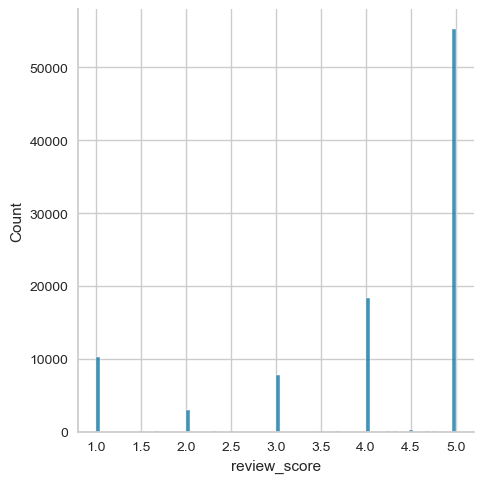

In [164]:
sns.displot(x=rfm_reviews['review_score'])

plt.show()

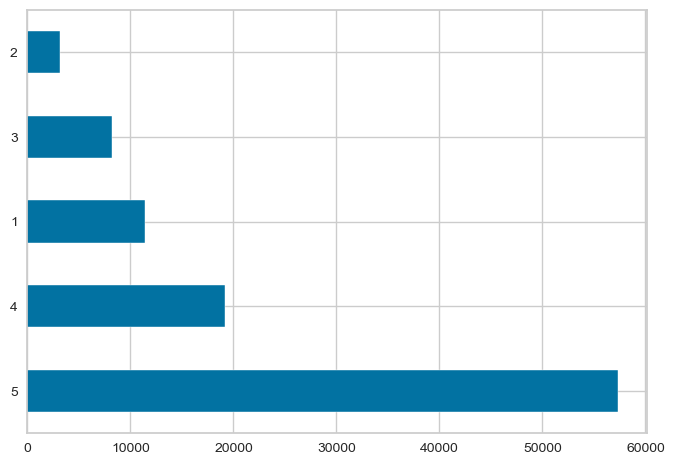

In [70]:
data['order_reviews'].review_score.value_counts().plot(kind='barh')
plt.show()

In [42]:
# sns.displot(rfm, x="log_m", hue="log_r")

# plt.show()


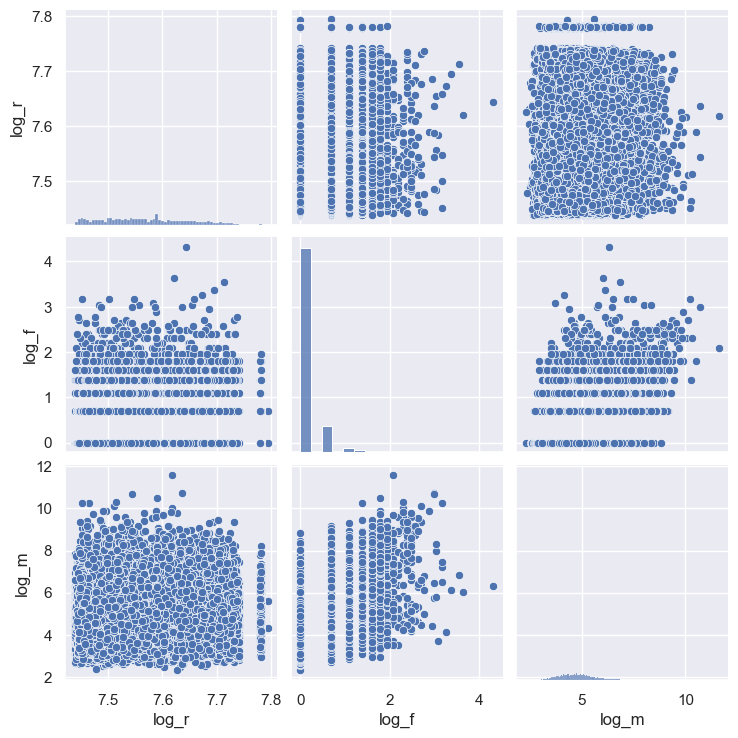

In [40]:
sns.pairplot(rfm[['log_r','log_f','log_m']])

plt.show()

In [41]:
rfm.describe()

,r,f,m,log_r,log_f,log_m
count,95417.000000,95417.000000,95417.000000,95417.000000,95417.000000,95417.000000
mean,1939.501493,1.232453,212.832013,7.567121,0.129081,4.802822
std,153.151645,0.823065,641.769353,0.077996,0.332974,0.916200
min,1701.000000,1.000000,10.070000,7.438972,0.000000,2.309561
25%,1815.000000,1.000000,63.910000,7.503841,0.000000,4.157476
50%,1920.000000,1.000000,113.150000,7.560080,0.000000,4.728714
75%,2049.000000,1.000000,202.540000,7.625107,0.000000,5.310937
max,2425.000000,75.000000,109312.640000,7.793587,4.317488,11.601967


## K means

In [44]:
# conda install -c conda-forge yellowbrick

In [42]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [43]:
#X = np.array(rfm[['log_r','log_f','log_m']]) # On utilise la version log rfm

In [165]:
rfm_reviews.isna().sum()

customer_unique_id    0
r                     0
f                     0
m                     0
rq                    0
fq                    0
mq                    0
score                 0
log_r                 0
log_f                 0
log_m                 0
review_score          0
dtype: int64

In [166]:
X = np.array(rfm_reviews[['log_r','log_f','log_m','review_score']]) # On utilise la version log rfm

In [44]:
#X = np.array(rfm[['r','f','m']]) # normal

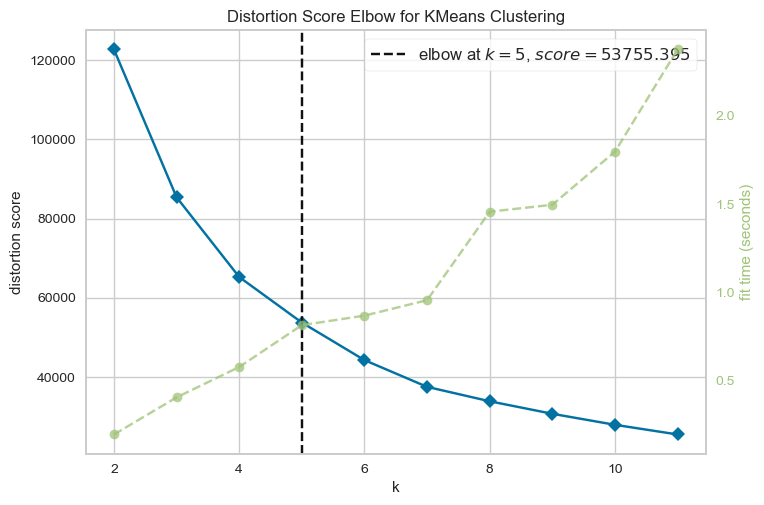

In [167]:

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

plt.show()

# Score Silhouette

In [47]:
from sklearn.metrics import silhouette_score

for n_clusters in range(2,8):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.49974816892292784)
For n_clusters = 3, silhouette score is 0.4790103704122112)
For n_clusters = 4, silhouette score is 0.4256018095178988)
For n_clusters = 5, silhouette score is 0.4180940443061998)
For n_clusters = 6, silhouette score is 0.4508723416522105)
For n_clusters = 7, silhouette score is 0.4358242577358228)


In [168]:
model = KMeans(5)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

plt.show()

KeyboardInterrupt: 

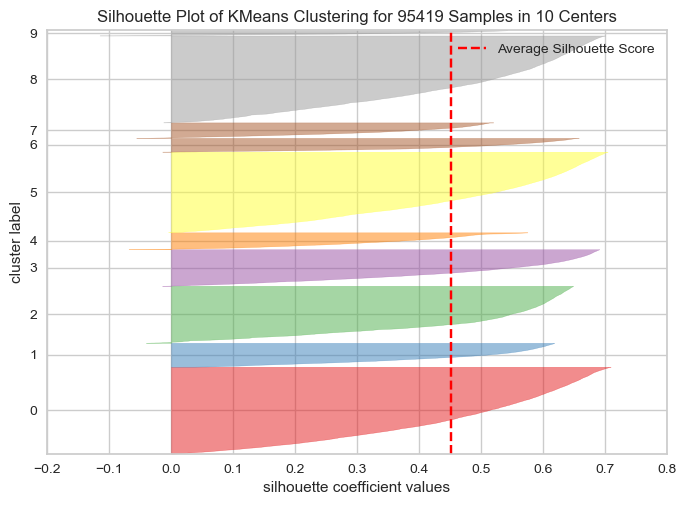

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 95419 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [57]:
model = KMeans(10)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

plt.show()

In [48]:
rfm.describe()

,r,f,m,log_r,log_f,log_m
count,95417.000000,95417.000000,95417.000000,95417.000000,95417.000000,95417.000000
mean,1939.501493,1.232453,212.832013,7.567121,0.129081,4.802822
std,153.151645,0.823065,641.769353,0.077996,0.332974,0.916200
min,1701.000000,1.000000,10.070000,7.438972,0.000000,2.309561
25%,1815.000000,1.000000,63.910000,7.503841,0.000000,4.157476
50%,1920.000000,1.000000,113.150000,7.560080,0.000000,4.728714
75%,2049.000000,1.000000,202.540000,7.625107,0.000000,5.310937
max,2425.000000,75.000000,109312.640000,7.793587,4.317488,11.601967


In [50]:
model = KMeans(n_clusters = 7, random_state=2023).fit(X)
y_pred = model.predict(X)
# plt.scatter(X[:,0],X[:,1],c= y_pred)
# plt.show()

# ACP 

In [77]:
# X = rfm[['r','f','m']]
# X = np.array(X)

In [169]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [170]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.37116238 0.25242981]
0.6235921867215946


In [174]:
model = KMeans(n_clusters = 5, random_state=2023).fit(X)
y_pred = model.predict(X)

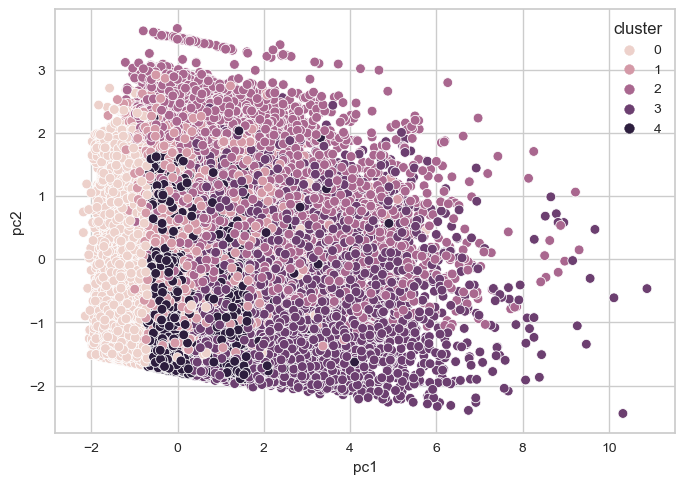

In [175]:
tmp = pd.DataFrame(pca.transform(X_scaled))
tmp.columns = ['pc1','pc2']
tmp['cluster'] = y_pred
sns.scatterplot(data=tmp, x='pc1',y='pc2',hue='cluster')
plt.show()

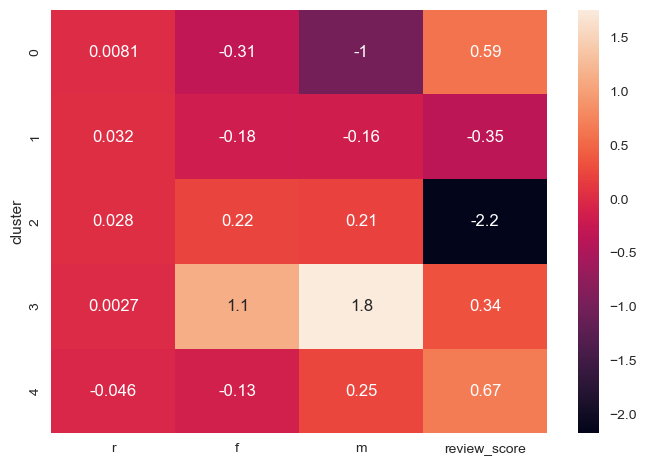

In [177]:

tmp = pd.DataFrame(X_scaled)
tmp.columns = ['r','f','m','review_score']
tmp['cluster'] = y_pred
tmp = tmp.groupby('cluster').mean()
sns.heatmap(tmp,annot=True)
plt.show()

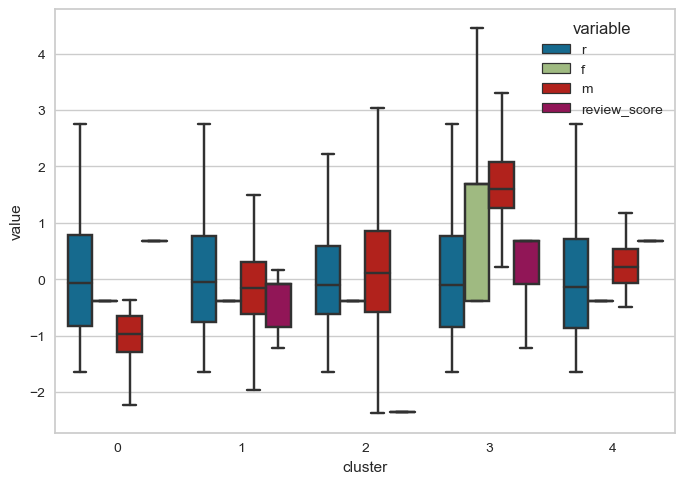

In [179]:

tmp = pd.DataFrame(X_scaled)
tmp.columns = ['r','f','m','review_score']
tmp['cluster'] = y_pred
tmp2 = pd.melt(frame = tmp, id_vars='cluster')

sns.boxplot(data=tmp2, x='cluster',y='value',hue='variable',showfliers=False)
plt.show()


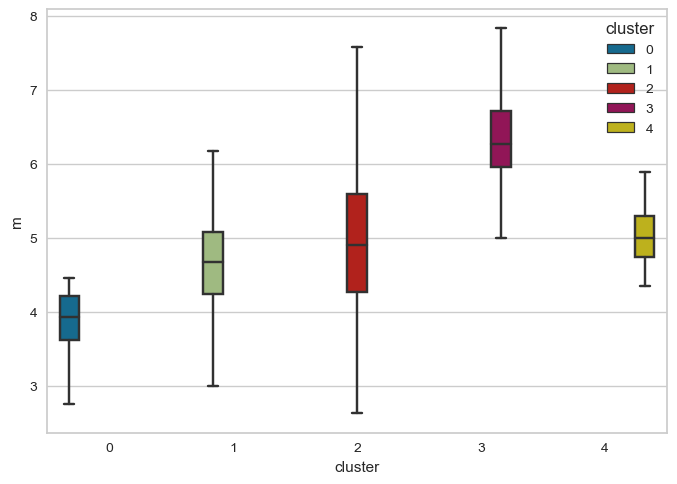

In [181]:
tmp = pd.DataFrame(X)
tmp.columns = ['r','f','m','review_score']
tmp['cluster'] = y_pred


sns.boxplot(data=tmp,
            x='cluster',
            y='m',
            hue='cluster',
            showfliers=False)
plt.show()


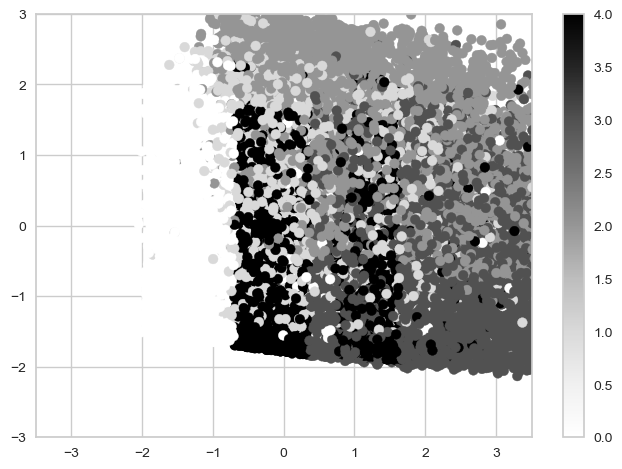

In [182]:
# projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)

# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 1],
            c=y_pred)

plt.xlim([-3.5, 3.5])
plt.ylim([-3, 3])
plt.colorbar()
plt.show()

# TSNE 

In [193]:
from sklearn.manifold import TSNE

In [194]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
               init='random', perplexity=3).fit_transform(X_scaled)

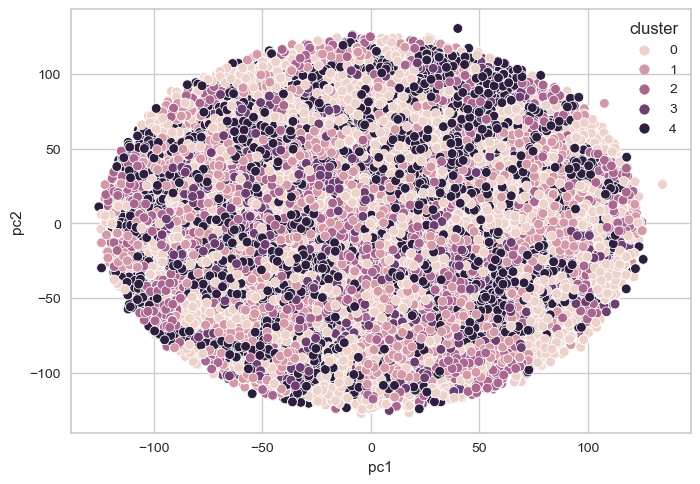

In [195]:
tmp = pd.DataFrame(X_embedded)
tmp.columns = ['pc1','pc2']
tmp['cluster'] = y_pred
sns.scatterplot(data=tmp, x='pc1',y='pc2',hue='cluster')
plt.show()

# DBSCAN 

In [183]:
from sklearn.cluster import DBSCAN

In [185]:
X_scaled

array([[-0.83280401, -0.3876624 ,  0.16622101,  0.67306986],
       [-0.81159219, -0.3876624 , -1.63737991, -0.08219827],
       [ 1.87469429, -0.3876624 , -0.37763017, -0.83746641],
       ...,
       [ 2.05108885, -0.3876624 , -0.08760036,  0.67306986],
       [-0.77631694, -0.3876624 ,  0.10116359,  0.67306986],
       [ 1.56737916, -0.3876624 , -0.58106487,  0.67306986]])

In [186]:
clustering = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)

In [187]:
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [189]:
np.unique(clustering.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [191]:
df.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_item_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'nb_days'],
      dtype='object')

# ARI à regarder ==> similarité 

In [192]:
#

# Dépôt de code / Brouillon 

# Fréquence 

In [73]:
df[['customer_unique_id','order_purchase_timestamp']]

,customer_unique_id,order_purchase_timestamp
0,b1a1199364a4a7fe27c4486ab63f550d,2018-04-24 16:16:53
1,4b86049cb99e4aa774031daa9cd18f18,2018-01-31 18:55:36
2,f63805d9c7edb84d92413af34b86a39c,2018-07-09 21:18:01
3,619e926d09b26efbd5180368b1ddc874,2018-08-03 08:55:50
4,ad353b4fb0e294adc4eda48af73e68a6,2018-04-11 01:06:37
...,...,...
117596,4d1bbadcfd9bdc738e54599627870319,2018-01-03 15:05:53
117597,2cc893f1618b7317170ba2456cf76117,2018-03-06 11:51:44
117598,2cc893f1618b7317170ba2456cf76117,2018-03-06 11:51:44
117599,2cc893f1618b7317170ba2456cf76117,2018-03-06 11:51:44


# Montant 

In [74]:
df[['customer_unique_id','payment_value']]

,customer_unique_id,payment_value
0,b1a1199364a4a7fe27c4486ab63f550d,18.30
1,4b86049cb99e4aa774031daa9cd18f18,265.99
2,f63805d9c7edb84d92413af34b86a39c,87.62
3,619e926d09b26efbd5180368b1ddc874,121.84
4,ad353b4fb0e294adc4eda48af73e68a6,46.19
...,...,...
117596,4d1bbadcfd9bdc738e54599627870319,92.02
117597,2cc893f1618b7317170ba2456cf76117,159.54
117598,2cc893f1618b7317170ba2456cf76117,159.54
117599,2cc893f1618b7317170ba2456cf76117,159.54


In [69]:
df['order_status'].value_counts(normalize=True)

delivered      0.978180
shipped        0.010578
canceled       0.004813
processing     0.003189
invoiced       0.003155
unavailable    0.000060
approved       0.000026
Name: order_status, dtype: float64

In [70]:
df[['customer_unique_id','customer_id']]

,customer_unique_id,customer_id
0,b1a1199364a4a7fe27c4486ab63f550d,f8a3e963a310aa58b60a5b1fed5bceb5
1,4b86049cb99e4aa774031daa9cd18f18,03fc97548af8f58fefc768d12b546c9c
2,f63805d9c7edb84d92413af34b86a39c,e41819d1c95c12c9ce495b630eab8aee
3,619e926d09b26efbd5180368b1ddc874,322162b5ca010c2b059cb5224dd818b1
4,ad353b4fb0e294adc4eda48af73e68a6,c11c31965ff02cc1d7132df8edfcbc22
...,...,...
117596,4d1bbadcfd9bdc738e54599627870319,e750210dde7e68dbd5194c0809e97f7e
117597,2cc893f1618b7317170ba2456cf76117,0f139d1b208a62a37671423e5eff5016
117598,2cc893f1618b7317170ba2456cf76117,0f139d1b208a62a37671423e5eff5016
117599,2cc893f1618b7317170ba2456cf76117,0f139d1b208a62a37671423e5eff5016


In [67]:
df[
    ['product_id',
       'order_id', 'customer_id', 'order_status', 
     
     'order_purchase_timestamp',
     
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_item_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'customer_unique_id',
    ]
]

,product_id,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id
0,1e9e8ef04dbcff4541ed26657ea517e5,e17e4f88e31525f7deef66779844ddce,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,1,debit_card,1,18.30,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,b1a1199364a4a7fe27c4486ab63f550d
1,3aa071139cb16b67ca9e5dea641aaa2f,5236307716393b7114b53ee991f36956,03fc97548af8f58fefc768d12b546c9c,delivered,2018-01-31 18:55:36,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22 00:00:00,1,voucher,1,265.99,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,4b86049cb99e4aa774031daa9cd18f18
2,96bd76ec8810374ed1b65e291975717f,01f66e58769f84129811d43eefd187fb,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18 00:00:00,1,credit_card,1,87.62,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,f63805d9c7edb84d92413af34b86a39c
3,cef67bcfe19066a932b7673e239eb23d,143d00a4f2dde4e0364ee1821577adb3,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08 00:00:00,1,credit_card,2,121.84,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,619e926d09b26efbd5180368b1ddc874
4,9dc1a7de274444849c219cff195d0b71,86cafb8794cb99a9b1b77fc8e48fbbbb,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-11 01:06:37,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26 00:00:00,1,credit_card,4,46.19,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,ad353b4fb0e294adc4eda48af73e68a6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,83808703fc0706a22e264b9d75f04a2e,59e88b7d3675e89aceaf86f372d3bc9a,e750210dde7e68dbd5194c0809e97f7e,delivered,2018-01-03 15:05:53,2018-01-04 05:14:57,2018-01-04 15:57:18,2018-01-15 20:39:35,2018-02-02 00:00:00,1,boleto,1,92.02,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11,4d1bbadcfd9bdc738e54599627870319
117597,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,0f139d1b208a62a37671423e5eff5016,delivered,2018-03-06 11:51:44,2018-03-08 02:49:35,2018-03-08 23:16:19,2018-03-23 20:08:40,2018-04-05 00:00:00,1,boleto,1,159.54,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,2cc893f1618b7317170ba2456cf76117
117598,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,0f139d1b208a62a37671423e5eff5016,delivered,2018-03-06 11:51:44,2018-03-08 02:49:35,2018-03-08 23:16:19,2018-03-23 20:08:40,2018-04-05 00:00:00,1,boleto,1,159.54,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,2cc893f1618b7317170ba2456cf76117
117599,83808703fc0706a22e264b9d75f04a2e,6e4465d771f02e4fe335225de3c6c043,0f139d1b208a62a37671423e5eff5016,delivered,2018-03-06 11:51:44,2018-03-08 02:49:35,2018-03-08 23:16:19,2018-03-23 20:08:40,2018-04-05 00:00:00,1,boleto,1,159.54,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,2cc893f1618b7317170ba2456cf76117


In [56]:
# olist_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv.zip')

# olist_order_custormer = pd.read_csv('olist_customers_dataset.csv.zip')

# olist_geolocation = pd.read_csv('olist_geolocation_dataset.csv.zip')

# olist_order_items = pd.read_csv('olist_order_items_dataset.csv.zip')

# olist_order_payments = pd.read_csv('olist_order_payments_dataset.csv.zip')

# olist_orders_dataset = pd.read_csv('olist_orders_dataset.csv.zip')

# olist_products_dataset = pd.read_csv('olist_products_dataset.csv.zip')

# olist_sellers_dataset = pd.read_csv('olist_sellers_dataset.csv')

# translation = pd.read_csv('product_category_name_translation.csv')

In [58]:
olist_order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [66]:
olist_order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [61]:
olist_order_custormer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [62]:
olist_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [64]:
olist_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [68]:
olist_order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [67]:
olist_order_payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [69]:
olist_order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [70]:
olist_orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [71]:
olist_products_dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [72]:
olist_sellers_dataset

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS
